## Final Model Building

In [1]:
import pandas as pd
import numpy as np
import gc
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_pickle('input/all_Eng_Features.p')

In [3]:
df_test = pd.read_pickle('input/all_Eng_Features_train.p')
df_test.dropna(inplace=True)
df_test.rename(columns={'order_id_x':'order_id'},inplace=True)

In [4]:
print('Length of training dataset: {:,}'.format(len(df_train.index)))
print('Length of test dataset: {:,}'.format(len(df_test.index)))

Length of training dataset: 11,375,135
Length of test dataset: 513,146


In [5]:
df_train.head()

,order_id,user_id,order_number,SucceedingOrdCnt,eval_set,order_dow,order_hour_of_day,product_id,reordered,aisle_id,...,minPrdOrd,maxOrd,possibility,ordPoss,dow_order_count,dow_item_cnt,dow_rank_diff,hour_order_count,hour_item_count,hour_rank_diff
0,2550362,1,10,1,prior,4,8,12427,1,23,...,1,9,9,1.000000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
1,2550362,1,10,1,prior,4,8,13032,1,121,...,2,9,8,0.250000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
2,2550362,1,10,1,prior,4,8,13176,0,24,...,2,9,8,0.250000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
3,2550362,1,10,1,prior,4,8,14084,0,91,...,1,9,9,0.111111,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
4,2550362,1,10,1,prior,4,8,17122,0,24,...,5,9,5,0.200000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0


In [7]:
df_test.head()

,order_id,user_id,order_number,SucceedingOrdCnt,eval_set,product_id,order_hour_of_day,order_dow,reordered,aisle_id,...,minPrdOrd,maxOrd,possibility,ordPoss,dow_order_count,dow_item_cnt,dow_rank_diff,hour_order_count,hour_item_count,hour_rank_diff
0,1187899,1,11,0,train,26405.0,8.0,4.0,1.0,54.0,...,1.0,9.0,9.0,0.222222,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
2,1187899,1,11,0,train,10258.0,8.0,4.0,1.0,117.0,...,2.0,9.0,8.0,1.000000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
3,1187899,1,11,0,train,13032.0,8.0,4.0,1.0,121.0,...,2.0,9.0,8.0,0.250000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
4,1187899,1,11,0,train,26088.0,8.0,4.0,1.0,23.0,...,1.0,9.0,9.0,0.222222,0.125184,0.117113,0.0,0.052756,0.053516,-1.0
6,1187899,1,11,0,train,49235.0,8.0,4.0,1.0,53.0,...,8.0,9.0,2.0,1.000000,0.125184,0.117113,0.0,0.052756,0.053516,-1.0


In [6]:
df_test.rename(columns={'order_id_x':'order_id'},inplace=True)

In [8]:
# Replace any infinity values that may have appeared as a result of ratio calculation in feature engineering phase
# with null values
df_train.replace([np.inf, -np.inf], np.nan,inplace=True)

df_test.replace([np.inf, -np.inf], np.nan,inplace=True)

In [9]:
#Replace null values with zeroes.
df_train['total_buy_ratio'].fillna(value=0,inplace=True)
df_test['total_buy_ratio'].fillna(value=0,inplace=True)

In [10]:
df_train_OrdUsr = df_train[['order_id','user_id']]
df_test_OrdUsr = df_test[['order_id','user_id']]

In [11]:
#drop unnecessary columns
df_train=df_train.drop(['eval_set','order_id','user_id','t-1_order_id','t-2_order_id','t-3_order_id'],axis=1)
df_test=df_test.drop(['eval_set','order_id','order_id_y','user_id','t-1_order_id','t-2_order_id','t-3_order_id'],axis=1)

In [12]:
#Convert object type columns to category to save memory space.
df_train[['reordered','product_id']] = df_train[['reordered','product_id']].astype('category')
df_test[['reordered','product_id']] = df_test[['reordered','product_id']].astype('category')

In [13]:
num_col = ['order_number','SucceedingOrdCnt','order_hour_of_day','order_dow','user_order_size-min','user_order_size-max','user_order_size-median','user_order_size-mean','user_order_size-std','item_hour_cnt','itemHrDist','unique_item_hour_cnt','unqItemHrDist','item_dow_cnt','itemDowDist','unique_item_dow_cnt','unqItemDowDist','prodComb_mean','prodComb_min','prodComb_max','prodComb_std','total_buy','total_buy_ratio','count','minPrdOrd','maxOrd','possibility','ordPoss','dow_order_count','dow_item_cnt','dow_rank_diff','hour_order_count','hour_item_count','hour_rank_diff']

cat_col = ['aisle_id','department_id']

In [14]:
df_train[cat_col]=df_train[cat_col].astype(object)
df_test[cat_col]=df_test[cat_col].astype(object)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
df_train_mm = pd.DataFrame(data=df_train)
df_test_mm = pd.DataFrame(data=df_test)

In [17]:
#Scale numeric columns to bring them all on to same scale
df_train_mm[num_col] = scaler.fit_transform(df_train[num_col])
df_test_mm[num_col] = scaler.fit_transform(df_test[num_col])

C:\Users\RajChoul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\RajChoul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
#Create dummy variables for category/object variables
df_train_T = pd.get_dummies(data=df_train_mm,prefix=cat_col,columns=cat_col)
df_test_T = pd.get_dummies(data=df_test_mm,prefix=cat_col,columns=cat_col)

In [19]:
# Extract random sample from the complete dataset
df_train_T_sample = df_train_T.sample(frac=0.005,random_state=75)
df_test_T_sample = df_test_T.sample(frac=0.1,random_state=19)

In [20]:
# Separate independent and dependent variables in the training dataset
products_train=df_train_T_sample['product_id']
features_train = df_train_T_sample.drop(['product_id'],axis=1)

In [21]:
# Separate independent and dependent variables in the test dataset
products_test=df_test_T_sample['product_id']
features_test = df_test_T_sample.drop(['product_id'],axis=1)

In [22]:
# Delete dataframes no longer required to save memory
del df_train_T_sample, df_train, df_train_mm, df_train_T
del df_test_T_sample, df_test, df_test_mm, df_test_T
gc.collect()

95

In [23]:
products_train.head()

8654196    42265
552776     39512
602962     30135
1181795     8442
1884369    26032
Name: product_id, dtype: category
Categories (46624, int64): [45, 57, 59, 65, ..., 49685, 49686, 49687, 49688]

In [24]:
features_train.dtypes

order_number               float64
SucceedingOrdCnt           float64
order_dow                  float64
order_hour_of_day          float64
reordered                 category
user_order_size-min        float64
user_order_size-max        float64
user_order_size-median     float64
user_order_size-mean       float64
user_order_size-std        float64
item_hour_cnt              float64
itemHrDist                 float64
unique_item_hour_cnt       float64
unqItemHrDist              float64
item_dow_cnt               float64
itemDowDist                float64
unique_item_dow_cnt        float64
unqItemDowDist             float64
prodComb_mean              float64
prodComb_min               float64
prodComb_max               float64
prodComb_std               float64
total_buy                  float64
total_buy_ratio            float64
count                      float64
minPrdOrd                  float64
maxOrd                     float64
possibility                float64
ordPoss             

In [25]:
features_test.dtypes

order_number               float64
SucceedingOrdCnt           float64
order_hour_of_day          float64
order_dow                  float64
reordered                 category
user_order_size-min        float64
user_order_size-max        float64
user_order_size-median     float64
user_order_size-mean       float64
user_order_size-std        float64
item_hour_cnt              float64
itemHrDist                 float64
unique_item_hour_cnt       float64
unqItemHrDist              float64
item_dow_cnt               float64
itemDowDist                float64
unique_item_dow_cnt        float64
unqItemDowDist             float64
prodComb_mean              float64
prodComb_min               float64
prodComb_max               float64
prodComb_std               float64
total_buy                  float64
total_buy_ratio            float64
count                      float64
minPrdOrd                  float64
maxOrd                     float64
possibility                float64
ordPoss             

In [26]:
features_train.head()

,order_number,SucceedingOrdCnt,order_dow,order_hour_of_day,reordered,user_order_size-min,user_order_size-max,user_order_size-median,user_order_size-mean,user_order_size-std,...,department_id_12,department_id_13,department_id_14,department_id_15,department_id_16,department_id_17,department_id_18,department_id_19,department_id_20,department_id_21
8654196,0.041237,0.0,0.000000,0.608696,0,0.02,0.062500,0.013793,0.036101,0.058944,...,0,0,0,0,0,0,0,0,0,0
552776,0.525773,0.0,1.000000,0.608696,0,0.00,0.277778,0.110345,0.166746,0.189559,...,0,1,0,0,0,0,0,0,0,0
602962,0.154639,0.0,0.166667,0.782609,1,0.04,0.083333,0.068966,0.086643,0.053152,...,0,0,0,0,0,0,0,0,0,0
1181795,0.989691,0.0,0.166667,0.695652,0,0.00,0.305556,0.117241,0.179327,0.181817,...,0,0,0,0,0,0,0,0,0,0
1884369,0.206186,0.0,0.666667,0.695652,0,0.02,0.215278,0.137931,0.162783,0.162424,...,0,0,0,0,1,0,0,0,0,0


In [27]:
features_test.head()

,order_number,SucceedingOrdCnt,order_hour_of_day,order_dow,reordered,user_order_size-min,user_order_size-max,user_order_size-median,user_order_size-mean,user_order_size-std,...,department_id_12.0,department_id_13.0,department_id_14.0,department_id_15.0,department_id_16.0,department_id_17.0,department_id_18.0,department_id_19.0,department_id_20.0,department_id_21.0
52540,0.083333,0.0,0.521739,0.500000,1.0,0.06,0.159722,0.179310,0.199541,0.176616,...,0,0,0,0,0,0,0,0,0,0
264527,0.208333,0.0,0.478261,0.166667,1.0,0.04,0.069444,0.082759,0.087898,0.063213,...,0,0,0,0,0,0,0,0,0,0
92582,0.114583,0.0,0.521739,0.500000,1.0,0.14,0.104167,0.131034,0.148530,0.064037,...,0,0,0,0,0,0,0,0,0,0
555789,0.031250,0.0,0.391304,0.166667,1.0,0.00,0.111111,0.103448,0.110710,0.153708,...,0,0,0,0,0,0,0,0,0,0
892857,0.031250,0.0,0.434783,0.666667,1.0,0.16,0.215278,0.193103,0.231047,0.189495,...,0,0,0,0,0,0,0,0,0,0


In [28]:
len(features_train.index)

56876

In [29]:
len(products_train.index)

56876

In [30]:
len(features_test.index)

51315

In [31]:
len(products_test.index)

51315

In [32]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt

In [25]:
#Split train and test dataset for training and validation
X_train, X_test, y_train, y_test = train_test_split(features_train, products_train, test_size = 0.2, random_state = 0)

In [26]:
def train_predict(classifier, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = classifier.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = classifier.predict(X_test)
    predictions_train = classifier.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute F1-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300],predictions_train,average='micro')
        
    # Compute F1-score on the test set which is y_test
    results['f_test'] = f1_score(y_test,predictions_test,average='micro')
       
    # Success
    print("{} trained on {} samples.".format(classifier.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [27]:
#Run dataset through multiple algorithms to determine the most suitable among them.
clf_A = SVC(random_state=58)
clf_B = RandomForestClassifier(random_state=69)
clf_C = AdaBoostClassifier(random_state=99)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(X_train)*1
samples_10 = int(len(X_train)*0.1)
samples_1 = int(len(X_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1]):#, samples_10
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

C:\Users\RajChoul\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 4550 samples.


C:\Users\RajChoul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 4550 samples.
AdaBoostClassifier trained on 4550 samples.


NameError: name 'accuracy' is not defined

In [32]:
#Print key metrics of the various algorithm after they've built the initial model to the most suitable algorithm.
for key, val in results.items():
    print(key)
    for k,v in val.items():
        for fet, score in v.items():
            print('\t{}: '.format(fet)+'{:.4f}'.format(score))

SVC
	train_time: 46.7256
	pred_time: 8764.9916
	f_train: 0.9600
	f_test: 0.0041
RandomForestClassifier
	train_time: 9.2232
	pred_time: 27.7419
	f_train: 0.9967
	f_test: 0.2188
AdaBoostClassifier
	train_time: 30.4512
	pred_time: 357.0798
	f_train: 0.0067
	f_test: 0.0070


In [29]:
#Classifier for best algorithm
ABCclf = AdaBoostClassifier(random_state=2) # AdaBoost Classifier

In [30]:
#Parameters for classifiers defined above
ABCparam = {'n_estimators':[15,25],'learning_rate':[0.5,0.8,1]}

In [31]:
def fit_model(classifier,param):
    #Performance Metric
    scorer = make_scorer(f1_score, average='micro')
    
    #Cross Validation Generator
    cv_gen = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    
    #Build Grid Search CV
    grid = GridSearchCV(classifier,param,scoring=scorer,cv=cv_gen)
    grid = grid.fit(features_train,products_train)
    best_score = grid.best_score_
    best_estimator = grid.best_estimator_
    best_parameters = grid.best_params_
    return best_score, best_estimator, best_parameters

In [32]:
#Fit the model and run through grid search to determine best parameters for algorithm
fit_model(ABCclf,ABCparam)

(0.010355133614627286,
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=0.5, n_estimators=15, random_state=2),
 {'learning_rate': 0.5, 'n_estimators': 15})

In [33]:
clf = AdaBoostClassifier(learning_rate=0.5,n_estimators=15,random_state=2)

In [34]:
from sklearn.externals import joblib

In [39]:
#Export the best algorithm so it can be retrieved without having to re-run the entire model above.
joblib.dump(clf,'BestClassifier.joblib')

['BestClassifier.joblib']

In [34]:
#Fit the most suitable algorithm with best parameters among the list of those supplied
clf.fit(features_train,products_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=15, random_state=2)

In [35]:
#make prediction on the dataset the model had never seen before to test the quality of the model.
test_prediction = clf.predict(features_test)

In [36]:
# Calculate the F1 score of the model, the measure of the model quality.
f1_test = f1_score(products_test,test_prediction,average='micro')

In [37]:
print('F1 score on test data: {}'.format(f1_test))

F1 score on test data: 0.015999220500828217


### Plot Feature Importance

In [38]:
# Plot the most important features in building the model above.
feature_names = list(features_train.columns.values)

In [50]:
importances = clf.feature_importances_

In [65]:
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

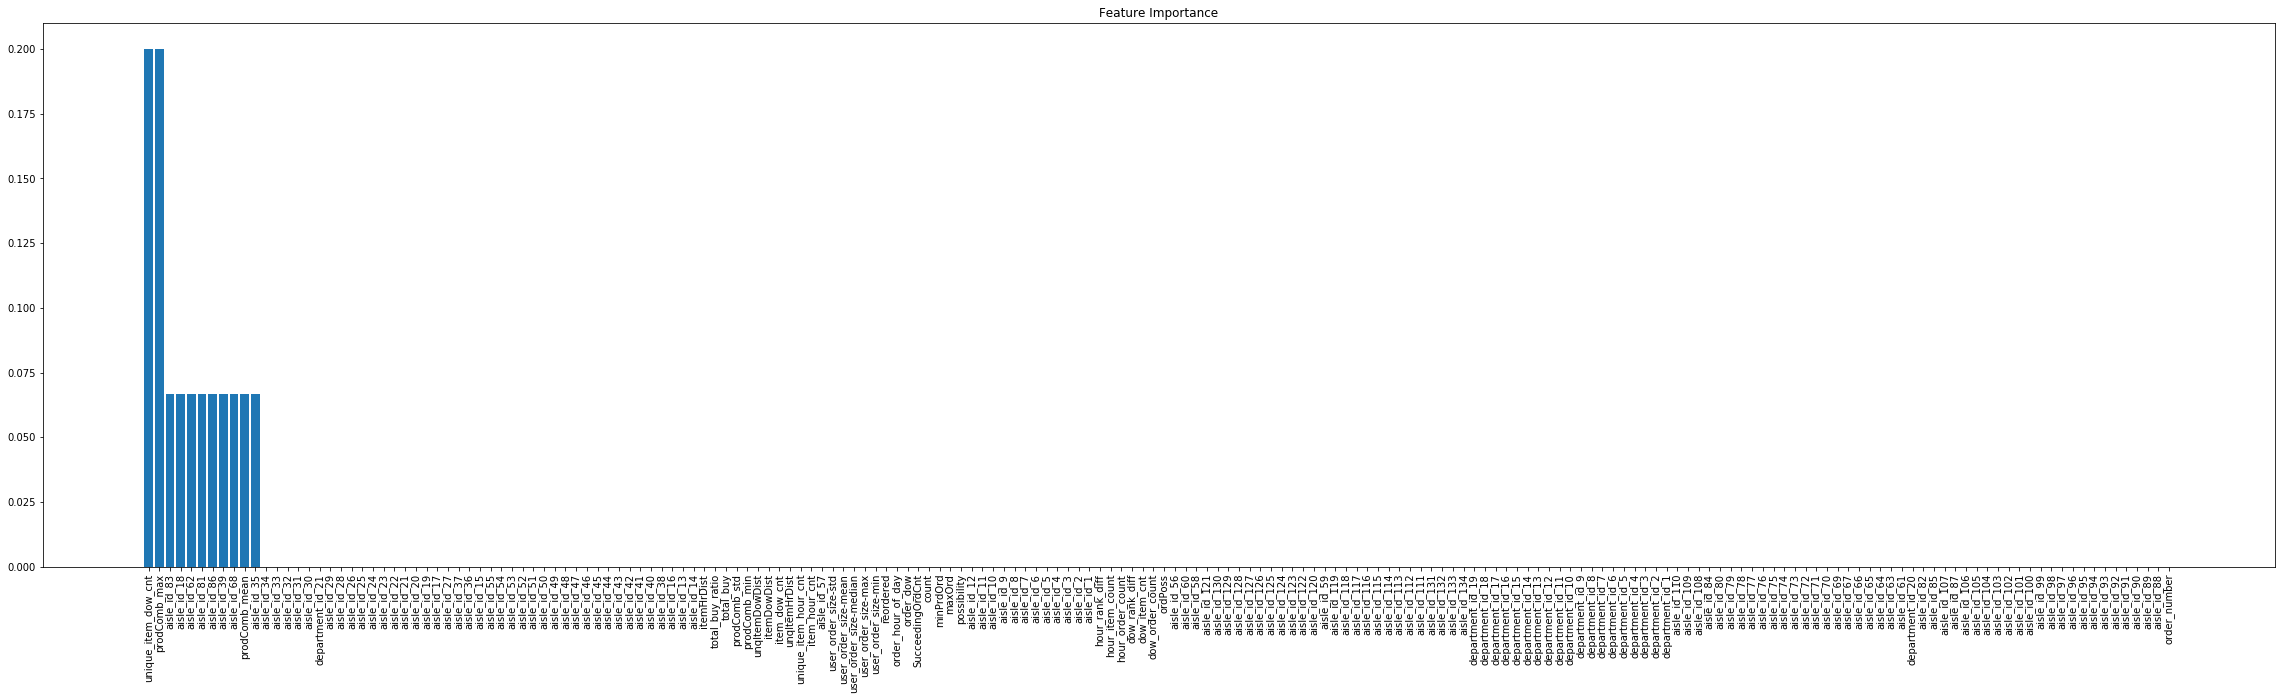

In [66]:
plt.rcParams['figure.figsize']=(40,10)
plt.title('Feature Importance')
p=plt.bar(range(features_train.shape[1]),importances[indices])
p=plt.xticks(range(features_train.shape[1]), names, rotation=90)

### Plot Confusion Matrix

In [ ]:
#plot the confusion matrix to provide a more visual representation of the classification performed by the model above.

#Method 1 to plot the confusion matrix
skplt.metrics.plot_confusion_matrix(products_test,test_prediction, normalize=True)
plt.show()

In [39]:
#Method 2 to plot the confusion matrix
cm=confusion_matrix(products_test,test_prediction)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


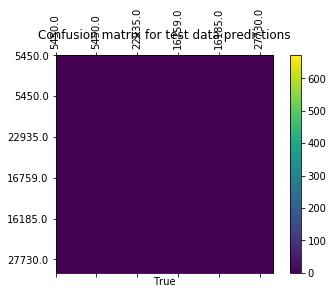

In [47]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix for test data predictions')
fig.colorbar(cax)
ax.set_xticklabels(products_test)
ax.set_yticklabels(products_test)
plt.xlabel('Prdicted')
plt.xlabel('True')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Method 3 to plot the confusion matrix
def plot_confusion_matrix(cm,target_names,title='Confusion Matrix', cmap=None,normalize=True):
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(cm,normalize=False,target_names=products_train.unique(),title='Confusion Matrix')